[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Stef0916/chemoinformatics-bioinformatics/blob/main/cheminformatics-workflow/notebooks/14-Chemical_reaction.ipynb)

# Chemical Reactions

## Necessary Library

In [1]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 34.2 MB/s eta 0:00:00


In [7]:
from rdkit import Chem, DataStructs
from rdkit.Chem.Draw import IPythonConsole, MolsToGridImage
from rdkit.Chem import Draw, Descriptors, PandasTools, AllChem
from rdkit.Chem import rdDepictor
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import MACCSkeys
from rdkit.Chem import GraphDescriptors
from rdkit.Chem import PandasTools
from rdkit.Chem.MolStandardize import rdMolStandardize
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.ML.Cluster import Butina
IPythonConsole.ipython_useSVG = True
rdDepictor.SetPreferCoordGen(True)
from rdkit.Chem import rdChemReactions

## Amide Coupling example

**The process is devided in three parts:**
1. Create the reaction with the SMARTS patterns and the `rdChemReactions.ReactionFromSmarts`
2. Complie the reactants within a tuple.
3. Get the products with the `rxn.RunReactants` command.

In [8]:
rxn = rdChemReactions.ReactionFromSmarts('[N:1]([C:2])[C:3].[C:4](=[O:5])[O:6]>>[N:1]([C:2])([C:3])[C:4]=[O:5].[O:6]')
#The numbers after the colons (indexing) are atom mapping numbers, allowing us to track specific atoms from reactants to products
reacts = (Chem.MolFromSmiles('CCCNCCC'),Chem.MolFromSmiles('c1ccccc1C(=O)O'))
products = rxn.RunReactants(reacts) #two mols as tuple

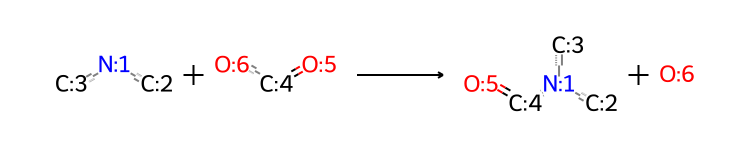

In [9]:
rxn

In [14]:
products

((<rdkit.Chem.rdchem.Mol at 0x7d7033447530>,
  <rdkit.Chem.rdchem.Mol at 0x7d70334475a0>),
 (<rdkit.Chem.rdchem.Mol at 0x7d7033447610>,
  <rdkit.Chem.rdchem.Mol at 0x7d7033447680>))

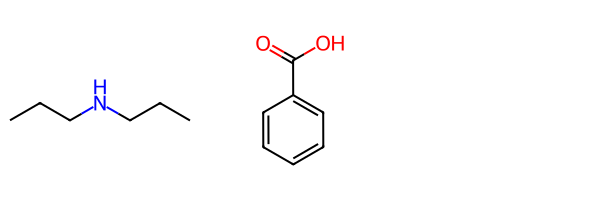

In [15]:
Draw.MolsToGridImage(reacts)

To access the major product: **`products[0][0]`**

Product SMILES: CCCN(CCC)C(=O)c1ccccc1


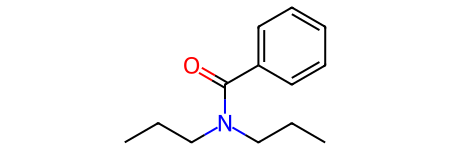

In [16]:
print(f"Product SMILES: {Chem.MolToSmiles(products[0][0])}")
products[0][0]

To access the subproducts: **`products[0][1]`**

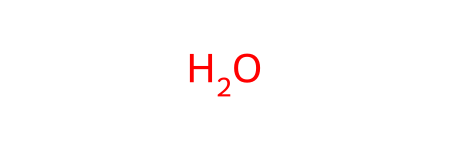

In [12]:
products[0][1]